### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate as spi
import scipy.integrate
from scipy.optimize import fminbound
import matplotlib.ticker as ticker

In [2]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.linewidth'] = 2

### Models

Madau & Dickinson

In [3]:
z = np.linspace(0, 20, 10000)

M_D = 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

trans_M_D = 0.66 * M_D

Harikane

In [4]:
harikane = 1 /(61.7 * (1+z)**(-3.13) + 1.0 * 10**(0.22*(1+z)) + 2.4 * 10**(0.5*(1+z) - 3.0))

### Data

Madau & Dickinson 

In [5]:
wyder_redshift = np.array([0.055])
wyder_z_lower = np.array([0.045])
wyder_z_upper = np.array([0.045])
wyder_data = np.array([-1.82])
wyder_data_lower = np.array([0.02])
wyder_data_upper = np.array([0.09])


schiminovich_redshift = np.array([0.3, 0.5, 0.7, 1.0])
schiminovich_z = np.array([0.1, 0.1, 0.1, 0.2])
schiminovich_data = np.array([-1.5, -1.39, -1.20, -1.25])
schiminovich_data_lower = np.array([0.05, 0.08, 0.13, 0.13])
schiminovich_data_upper = np.array([0.05, 0.15, 0.31, 0.31]) 
schiminovich_errors = np.array([schiminovich_data_lower, schiminovich_data_upper])

robotham_redshift = np.array([0.05])
robotham_data = np.array([-1.77])
robotham_data_lower = np.array([0.09])
robotham_data_upper = np.array([0.08])


cucciati_redshift= np.array([0.125, 0.3, 0.5, 0.7, 0.9, 1.1, 1.45, 2.1, 3.0, 4.0])
cucciati_z = np.array([0.075, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.4, 0.5, 0.5])
cucciati_data = np.array([-1.75, -1.55, -1.44, -1.24, -0.99, -0.94, -0.95, -0.75, -1.04, -1.69])
cucciati_data_lower = np.array([0.18, 0.12, 0.10, 0.10, 0.08, 0.09, 0.8, 0.09, 0.15, 0.32])
cucciati_data_upper = np.array([0.18, 0.12, 0.10, 0.10, 0.09, 0.09, 0.15, 0.49, 0.26, 0.22])
cucciati_errors = np.array([cucciati_data_lower, cucciati_data_upper])


dahlen_redshift = np.array([1.125, 1.75, 2.225])
dahlen_z = np.array([0.205, 0.13, 0.145])
dahlen_data = np.array([-1.02, -0.75, -0.87])
dahlen_data_lower = np.array([0.08, 0.12, 0.09])
dahlen_data_upper = np.array([0.08, 0.12, 0.09])
dahlen_errors = np.array([dahlen_data_lower, dahlen_data_upper])

reddy_redshift = np.array([2.3, 3.05])
reddy_z = np.array([0.4, 0.35])
reddy_data = np.array([-0.75, -0.97])
reddy_data_lower = np.array([0.11, 0.15])
reddy_data_upper = np.array([0.09, 0.11])
reddy_errors = np.array([reddy_data_lower, reddy_data_upper])

bouwens_redshift = np.array([3.8, 4.9, 5.9, 7.0, 7.9])
bouwens_data = np.array([-1.29, -1.42, -1.65, -1.79, -2.09])
bouwens_data_lower = np.array([0.05, 0.06, 0.08, 0.10, 0.11])
bouwens_data_upper = np.array([0.05, 0.06, 0.08, 0.10, 0.11])
bouwens_errors = np.array([bouwens_data_lower, bouwens_data_upper])

schenker_redshift = np.array([7])
schenker_data = np.array([-2.00])
schenker_data_lower = np.array([0.11])
schenker_data_upper = np.array([0.10])
schenker_errors = np.array([schenker_data_lower, schenker_data_upper])

In [6]:
sanders_redshift = np.array([0.03])
sanders_data = np.array([-1.72])
sanders_data_lower = np.array([0.03])
sanders_data_upper = np.array([0.02])
sanders_errors = np.array([sanders_data_lower, sanders_data_upper])

takeuchi_redshift = np.array([0.03])
takeuchi_data = np.array([-1.95])
takeuchi_data_lower = np.array([0.20])
takeuchi_data_upper = np.array([0.20])
takeuchi_errors = np.array([takeuchi_data_lower, takeuchi_data_upper])

magnelli11_redshift = np.array([0.55, 0.85, 1.15, 1.55, 2.05])
magnelli11_z = np.array([0.15, 0.15, 0.15, 0.25, 0.25])
magnelli11_data = np.array([-1.34, -0.96, -0.89, 0.91, -0.89])
magnelli11_data_lower = np.array([0.11, 0.19, 0.21, 0.21, 0.25])
magnelli11_data_upper = np.array([0.22, 0.15, 0.27, 0.17, 0.21])
magnelli11_errors = np.array([magnelli11_data_lower, magnelli11_data_upper])

magnelli13_redshift = np.array([0.55, 0.85, 1.15, 1.55, 2.05])
magnelli13_z = np.array([0.15, 0.15, 0.15, 0.25, 0.25])
magnelli13_data = np.array([-1.22, -1.10, -0.96, -0.94, -0.8])
magnelli13_data_lower = np.array([0.11, 0.13, 0.20, 0.18, 0.15])
magnelli13_data_upper = np.array([0.08, 0.10, 0.13, 0.13, 0.18])
magnelli13_errors = np.array([magnelli13_data_lower, magnelli13_data_upper])

gruppioni_redshift = np.array([0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6])
gruppioni_z = np.array([0.15, 0.075, 0.075, 0.1, 0.1, 0.1, 0.25, 0.15, 0.25, 0.25, 0.6])
gruppioni_data = np.array([-1.64, -1.42, -1.32, -1.14, -0.94, -0.81, -0.84, -0.86, -0.91, -0.86, -1.36])
gruppioni_data_lower = np.array([0.11, 0.04, 0.05, 0.06, 0.06, 0.05, 0.04, 0.03, 0.12, 0.23, 0.5])
gruppioni_data_upper = np.array([0.09, 0.03, 0.05, 0.06, 0.05, 0.04, 0.04, 0.02, 0.09, 0.15, 0.23])
gruppioni_errors = np.array([gruppioni_data_lower, gruppioni_data_upper])

Finkelstein

THE EVOLUTION OF THE GALAXY REST-FRAME ULTRAVIOLET LUMINOSITY FUNCTION OVER THE FIRST TWO BILLION YEARS (2015)

They provide both observed and dust-corrected values for the log of SFR density

In [7]:
finkelstein_redshift = np.array([4, 5, 6, 7, 8])
finkelstein_data_obs = np.array([-1.59, -1.69, -1.97, -2.09, -2.20])
finkelstein_data_obs_lower = np.array([0.01, 0.01, 0.02, 0.06, 0.19])
finkelstein_data_obs_upper = np.array([0.01, 0.01, 0.02, 0.06, 0.19])
finkelstein_obs_errors = np.array([finkelstein_data_obs_lower, finkelstein_data_obs_upper])
finkelstein_data_dc = np.array([-1.03, -1.20, -1.68, -1.85, -2.20])
finkelstein_data_dc_lower = np.array([0.21, 0.25, 0.18, 0.16, 0.19])
finkelstein_data_dc_upper = np.array([0.23, 0.20, 0.24, 0.22, 0.19])
finkelstein_dc_errors = np.array([finkelstein_data_dc_lower, finkelstein_data_dc_upper])

Harikane

In [8]:
harikane_redshift = np.array([9, 12, 16])
harikane_data = np.array([-2.61, -3.23, -3.59])
harikane_data_lower = np.array([0.16, 0.27, 2.83])
harikane_data_upper = np.array([0.18, 0.29, 0.33])
harikane_errors = np.array([harikane_data_lower, harikane_data_upper])

In [9]:
mcleod16_redshift = np.array([9, 10])
mcleod16_data = np.array([-2.59, -2.76])
mcleod16_data_lower = np.array([0.14, 0.21])
mcleod16_data_upper = np.array([0.10, 0.14])

#### 'High z'

Note: 'Donnan' refers to the best fit produced by the Donnan et al. paper:

The evolution of the galaxy UV luminosity function at redshifts z 8 – 15 from deep JWST and ground-based near-infrared imaging

In [10]:
log_10_donnan = -0.231*z +27.5 - 27.93930216

McLeod et al. 2023:

The galaxy UV luminosity function at z 11 from a suite of public JWST ERS, ERO, and Cycle-1 programs

In [11]:
mcleod23_redshift = np.array([11])
mcleod23_data = np.array([25.15 - 27.93930216])
mcleod23_data_lower = np.array([0.14])
mcleod23_data_upper = np.array([0.13])

mcleod23_tent_redshift = np.array([13.5])
mcleod23_tent_data = np.array([24.54 - 27.93930216])
mcleod23_tent_data_lower = np.array([0.25])
mcleod23_tent_data_upper = np.array([0.16])

Perz-Gonzalez 2023:

Life beyond 30: Probing the −20<MUV<−17 Luminosity Function at 8<z<13 with the NIRCam Parallel Field of the MIRI Deep Survey

In [12]:
pg23_redshift = np.array([9, 10.75, 12.12])
pg23_z = np.array([1, 0.75, 0.75])
pg23_data = np.array([-2.760325212, -2.812197361, -3.240332155])
pg23_data_lower = np.array([0.14, 0.14, 0.21])
pg23_data_upper = np.array([0.28, 0.12, 0.11])

Oesch 2018:

The Dearth of z ∼ 10 Galaxies in All HST Legacy Fields—The Rapid Evolution of the Galaxy Population in the First 500 Myr*

In [13]:
oesch18_redshift = np.array([10])
oesch18_data = np.array([-3.29])
oesch18_data_lower = np.array([0.16])
oesch18_data_upper = np.array([0.16])

Bouwens et al. 2022:

Evolution of the 𝑈𝑉 LF from 𝑧 ∼ 15 to 𝑧 ∼ 8 Using New JWST NIRCam Medium-Band Observations over the HUDF/XDF

Note: when you consider these, be aware that they have a limiting magnitude of -18. A lot of the others have -17

In [14]:
bouwens22_redshift = np.array([8.7, 10.5, 12.6])
bouwens22_data = np.array([-3.00, -3.82, -3.24])
bouwens22_data_lower = np.array([0.24, 0.30, 0.48])
bouwens22_data_upper = np.array([0.24, 0.30, 0.37])


### Plotting

In [15]:
h = 0.6766
omega_M = 0.3111
omega_L = 0.6889

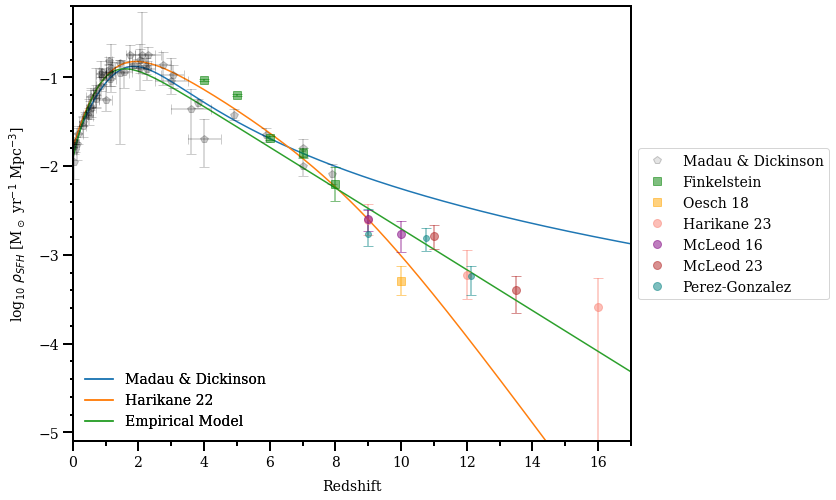

In [16]:
fig = plt.figure(figsize=(10, 8))

plt.plot(z, np.log10(M_D), label='Madau & Dickinson')
plt.plot(z, np.log10(harikane), label = 'Harikane 22')
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), label = 'Empirical Model')


plt.xlim(0, 17)
plt.ylim(-5.1, -0.2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)


plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([wyder_data_lower, wyder_data_upper]), xerr=np.array([wyder_z_lower, wyder_z_upper]), capsize=5, fmt='p', color='Black', label='Madau & Dickinson', alpha=0.2, markersize=8)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([robotham_data_lower, robotham_data_upper]), capsize = 5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr=dahlen_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr=reddy_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr=magnelli11_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr=magnelli13_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr=gruppioni_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='s', label = 'Finkelstein', color = 'green', alpha = 0.5, markersize = 8)
plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 's', label = 'Oesch 18', color = 'orange', capsize = 5, alpha = 0.5, markersize = 8)

plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.2)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23 (T)', markersize = 8)
plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='p', linestyle = '', color='black', markerfacecolor='grey', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='green', markerfacecolor='green', alpha = 0.5, markersize=8, label='Finkelstein'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='orange', markerfacecolor='orange', alpha = 0.5, markersize=8, label='Oesch 18'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))

plt.gca().add_artist(legend_errorbar)


legend_elements_dataset = [
    plt.Line2D([0], [0], marker='p', color='black', markerfacecolor='black', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', color='black', markerfacecolor='w', markersize=8, label='Harikane'),
    plt.Line2D([0], [0], marker='o', color='black', markerfacecolor='w', markersize=8, label='High z'),
]

legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Madau & Dickinson', 'Harikane 22', 'Empirical Model'])
plt.gca().add_artist(legend_curves)




Comparison with Donnan best fit produced in:

The evolution of the galaxy UV luminosity function at redshifts z 8 – 15 from deep JWST and ground-based near-infrared imaging

Text(0.5, 0, 'Redshift')

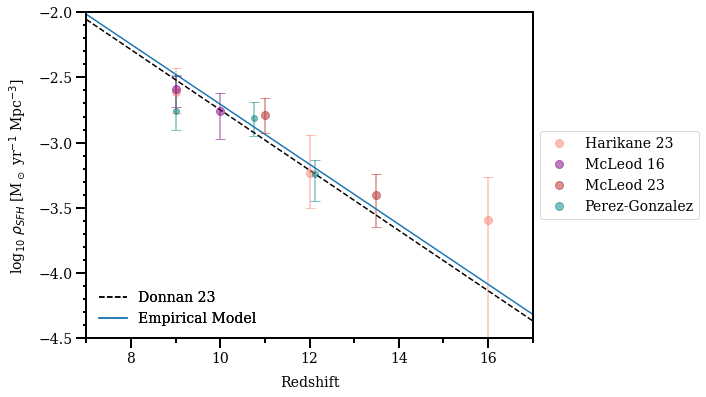

In [17]:
fig = plt.figure(figsize=(8, 6))

plt.plot(z, log_10_donnan, '--', color = 'black', label = 'Donnan Best Fit')
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), label = 'Empirical Model')

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)


plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.1)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5,markersize = 8)
plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))

plt.gca().add_artist(legend_errorbar)


legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Donnan 23', 'Empirical Model'])
plt.gca().add_artist(legend_curves)



plt.xlim(7, 17)
plt.ylim(-4.5, -2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)

### Plot 1

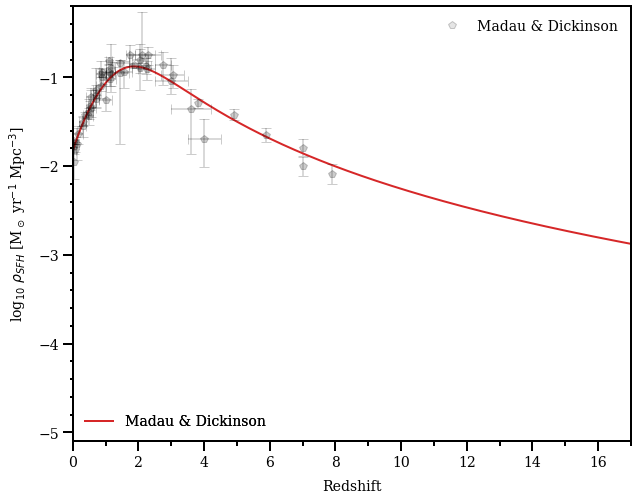

In [18]:
fig = plt.figure(figsize=(10, 8))

plt.plot(z, np.log10(M_D), color = '#d62728', label='Madau & Dickinson', lw = 2)
#plt.plot(z, np.log10(harikane), label = 'Harikane 22')
#plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), label = 'Empirical Model')


plt.xlim(0, 17)
plt.ylim(-5.1, -0.2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)


plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([wyder_data_lower, wyder_data_upper]), xerr=np.array([wyder_z_lower, wyder_z_upper]), capsize=5, fmt='p', color='Black', label='Madau & Dickinson', alpha=0.2, markersize=8)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([robotham_data_lower, robotham_data_upper]), capsize = 5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr=dahlen_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr=reddy_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr=magnelli11_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr=magnelli13_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr=gruppioni_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)


#plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='s', label = 'Finkelstein', color = 'green', alpha = 0.5, markersize = 8)
#plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 's', label = 'Oesch 18', color = 'orange', capsize = 5, alpha = 0.5, markersize = 8)

plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.2)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)

#plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
#plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
#plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23 (T)', markersize = 8)
#plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')
#plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='p', linestyle = '', color='black', markerfacecolor='grey', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    #plt.Line2D([0], [0], marker='s', linestyle = '', color='green', markerfacecolor='green', alpha = 0.5, markersize=8, label='Finkelstein'),
    #plt.Line2D([0], [0], marker='s', linestyle = '', color='orange', markerfacecolor='orange', alpha = 0.5, markersize=8, label='Oesch 18'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

#legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))

legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='upper right', frameon = False)

plt.gca().add_artist(legend_errorbar)


legend_elements_dataset = [
    plt.Line2D([0], [0], marker='p', color='black', markerfacecolor='black', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', color='black', markerfacecolor='w', markersize=8, label='Harikane'),
    plt.Line2D([0], [0], marker='o', color='black', markerfacecolor='w', markersize=8, label='High z'),
]

legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Madau & Dickinson'])
plt.gca().add_artist(legend_curves)

plt.savefig('/Users/dillon/Desktop/Data Plot1')



### Plot 2

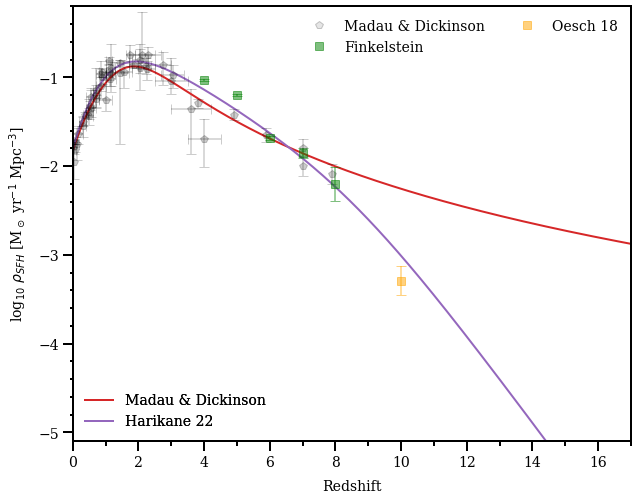

In [19]:
fig = plt.figure(figsize=(10, 8))

plt.plot(z, np.log10(M_D), color = '#d62728', label='Madau & Dickinson', lw = 2)
plt.plot(z, np.log10(harikane), color = '#9467bd', label = 'Harikane 22', lw = 2)

#plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), label = 'Empirical Model')


plt.xlim(0, 17)
plt.ylim(-5.1, -0.2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)


plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([wyder_data_lower, wyder_data_upper]), xerr=np.array([wyder_z_lower, wyder_z_upper]), capsize=5, fmt='p', color='Black', label='Madau & Dickinson', alpha=0.2, markersize=8)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([robotham_data_lower, robotham_data_upper]), capsize = 5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr=dahlen_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr=reddy_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr=magnelli11_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr=magnelli13_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr=gruppioni_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='s', label = 'Finkelstein', color = 'green', alpha = 0.5, markersize = 8)
plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 's', label = 'Oesch 18', color = 'orange', capsize = 5, alpha = 0.5, markersize = 8)

plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.2)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)

#plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
#plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
#plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23 (T)', markersize = 8)
#plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')
#plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='p', linestyle = '', color='black', markerfacecolor='grey', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='green', markerfacecolor='green', alpha = 0.5, markersize=8, label='Finkelstein'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='orange', markerfacecolor='orange', alpha = 0.5, markersize=8, label='Oesch 18'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    #plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

#legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))
legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='upper right', ncol=2, frameon = False)


plt.gca().add_artist(legend_errorbar)


legend_elements_dataset = [
    plt.Line2D([0], [0], marker='p', color='black', markerfacecolor='black', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', color='black', markerfacecolor='w', markersize=8, label='Harikane'),
    plt.Line2D([0], [0], marker='o', color='black', markerfacecolor='w', markersize=8, label='High z'),
]

legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Madau & Dickinson', 'Harikane 22'])
plt.gca().add_artist(legend_curves)

plt.savefig('/Users/dillon/Desktop/Data Plot2')


### Plot 3

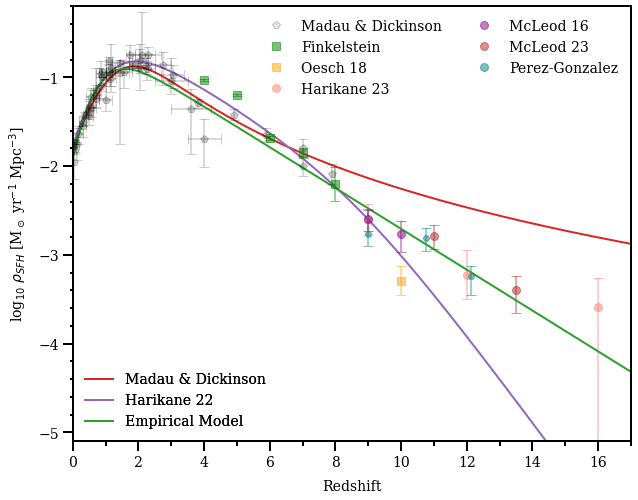

In [20]:
fig = plt.figure(figsize=(10, 8))

plt.plot(z, np.log10(M_D), color = '#d62728', label='Madau & Dickinson', lw = 2)
plt.plot(z, np.log10(harikane), color = '#9467bd', label = 'Harikane 22', lw = 2)
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), color = '#2ca02c', label = 'Empirical Model', lw = 2)


plt.xlim(0, 17)
plt.ylim(-5.1, -0.2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)


plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([wyder_data_lower, wyder_data_upper]), xerr=np.array([wyder_z_lower, wyder_z_upper]), capsize=5, fmt='p', color='Black', label='Madau & Dickinson', alpha=0.2, markersize=8)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([robotham_data_lower, robotham_data_upper]), capsize = 5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr=dahlen_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr=reddy_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr=magnelli11_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr=magnelli13_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr=gruppioni_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='s', label = 'Finkelstein', color = 'green', alpha = 0.5, markersize = 8)
plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 's', label = 'Oesch 18', color = 'orange', capsize = 5, alpha = 0.5, markersize = 8)

plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.2)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23 (T)', markersize = 8)
plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='p', linestyle = '', color='black', markerfacecolor='grey', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='green', markerfacecolor='green', alpha = 0.5, markersize=8, label='Finkelstein'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='orange', markerfacecolor='orange', alpha = 0.5, markersize=8, label='Oesch 18'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

#legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))
legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='upper right', ncol = 2, frameon = False)
plt.gca().add_artist(legend_errorbar)



legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Madau & Dickinson', 'Harikane 22', 'Empirical Model'])
plt.gca().add_artist(legend_curves)

plt.savefig('/Users/dillon/Desktop/Data Plot')



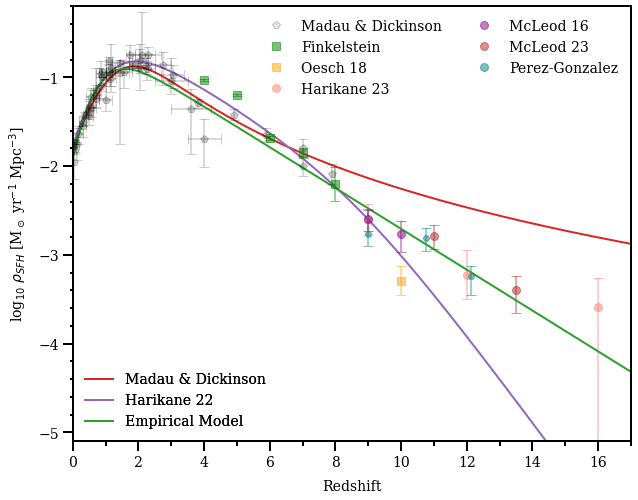

In [21]:
fig = plt.figure(figsize=(10, 8))

plt.plot(z, np.log10(M_D), color = '#d62728', label='Madau & Dickinson', lw = 2)
plt.plot(z, np.log10(harikane), color = '#9467bd', label = 'Harikane 22', lw = 2)
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), color = '#2ca02c', label = 'Empirical Model', lw = 2)


plt.xlim(0, 17)
plt.ylim(-5.1, -0.2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)


plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([wyder_data_lower, wyder_data_upper]), xerr=np.array([wyder_z_lower, wyder_z_upper]), capsize=5, fmt='p', color='Black', label='Madau & Dickinson', alpha=0.2, markersize=8)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([robotham_data_lower, robotham_data_upper]), capsize = 5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr=dahlen_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr=reddy_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr=magnelli11_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr=magnelli13_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr=gruppioni_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='s', label = 'Finkelstein', color = 'green', alpha = 0.5, markersize = 8)
plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 's', label = 'Oesch 18', color = 'orange', capsize = 5, alpha = 0.5, markersize = 8)

plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.2)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23 (T)', markersize = 8)
plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='p', linestyle = '', color='black', markerfacecolor='grey', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='green', markerfacecolor='green', alpha = 0.5, markersize=8, label='Finkelstein'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='orange', markerfacecolor='orange', alpha = 0.5, markersize=8, label='Oesch 18'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

###Original Data Legend:
#legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))

legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='upper right', ncol = 2, frameon = False)

plt.gca().add_artist(legend_errorbar)



legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Madau & Dickinson', 'Harikane 22', 'Empirical Model'])
plt.gca().add_artist(legend_curves)

#plt.subplots_adjust(right=0.8)

#plt.savefig('/Users/dillon/Desktop/Data Plot', bbox_inches='tight')

plt.savefig('/Users/dillon/Desktop/Data Plot#3')




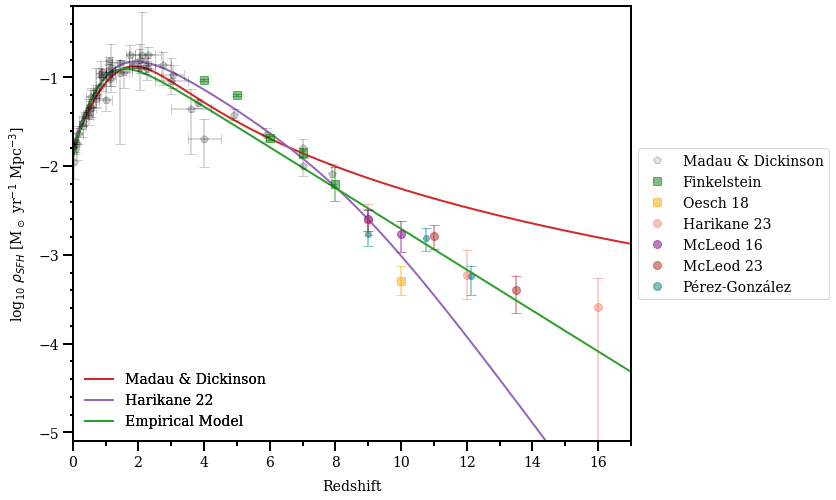

In [25]:
fig = plt.figure(figsize=(10, 8))

plt.plot(z, np.log10(M_D), color = '#d62728', label='Madau & Dickinson', lw = 2)
plt.plot(z, np.log10(harikane), color = '#9467bd', label = 'Harikane 22', lw = 2)
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), color = '#2ca02c', label = 'Empirical Model', lw = 2)


plt.xlim(0, 17)
plt.ylim(-5.1, -0.2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)


plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([wyder_data_lower, wyder_data_upper]), xerr=np.array([wyder_z_lower, wyder_z_upper]), capsize=5, fmt='p', color='Black', label='Madau & Dickinson', alpha=0.2, markersize=8)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([robotham_data_lower, robotham_data_upper]), capsize = 5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr=dahlen_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr=reddy_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr=magnelli11_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr=magnelli13_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr=gruppioni_z, capsize=5, fmt='p', color='Black', alpha=0.2, markersize=8)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='s', label = 'Finkelstein', color = 'green', alpha = 0.5, markersize = 8)
plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 's', label = 'Oesch 18', color = 'orange', capsize = 5, alpha = 0.5, markersize = 8)

plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.2)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23 (T)', markersize = 8)
plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='p', linestyle = '', color='black', markerfacecolor='grey', markersize=8, alpha = 0.2, label='Madau & Dickinson'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='green', markerfacecolor='green', alpha = 0.5, markersize=8, label='Finkelstein'),
    plt.Line2D([0], [0], marker='s', linestyle = '', color='orange', markerfacecolor='orange', alpha = 0.5, markersize=8, label='Oesch 18'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Pérez-González'),

]

#legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))
legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(legend_errorbar)



legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Madau & Dickinson', 'Harikane 22', 'Empirical Model'])
plt.gca().add_artist(legend_curves)

plt.savefig('/Users/dillon/Desktop/Report Plots/Data Plot', bbox_inches='tight')



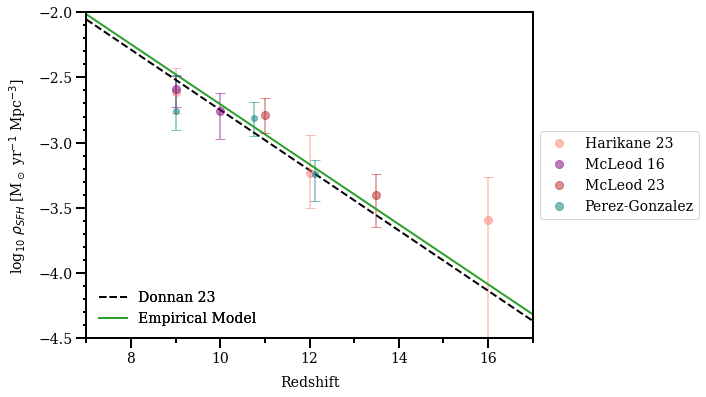

In [23]:
fig = plt.figure(figsize=(8, 6))

plt.plot(z, log_10_donnan, '--', color = 'black', label = 'Donnan Best Fit', lw = 2)
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), color = '#2ca02c' , label = 'Empirical Model', lw = 2)

plt.gca().xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
plt.gca().xaxis.set_tick_params(which='both')
major_locator_x = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(major_locator_x)
minor_locator_x = ticker.MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator_x)


plt.gca().yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='minor', size=3, width=2, direction='out', right=True)
plt.gca().yaxis.set_tick_params(which='both', right=False)
minor_locator = ticker.MultipleLocator(0.1)
plt.gca().yaxis.set_minor_locator(minor_locator)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', color = 'salmon', alpha = 0.5, markersize = 8)
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), color = 'purple', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 16', markersize = 8)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5, label = 'McLeod 23', markersize = 8)
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), color = 'firebrick', alpha = 0.5, fmt = 'o', capsize = 5,markersize = 8)
plt.errorbar(pg23_redshift, pg23_data, yerr = np.array([pg23_data_lower, pg23_data_upper]), color = 'teal', alpha = 0.5, fmt = 'o', capsize = 5, label = 'Perez-Gonzalez')


legend_elements_errorbar = [
    plt.Line2D([0], [0], marker='o', linestyle = '', color='salmon', markerfacecolor='salmon', alpha = 0.5, markersize=8, label='Harikane 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='purple', markerfacecolor='purple', alpha = 0.5, markersize=8, label='McLeod 16'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='firebrick', markerfacecolor='firebrick', alpha = 0.5, markersize=8, label='McLeod 23'),
    plt.Line2D([0], [0], marker='o', linestyle = '', color='teal', markerfacecolor='teal', alpha = 0.5, markersize=8, label='Perez-Gonzalez'),

]

legend_errorbar = plt.legend(handles=legend_elements_errorbar, loc='center left', bbox_to_anchor=(1, 0.5))

plt.gca().add_artist(legend_errorbar)


legend_curves = plt.legend(frameon = False, loc='lower left', labels=['Donnan 23', 'Empirical Model'])
plt.gca().add_artist(legend_curves)



plt.xlim(7, 17)
plt.ylim(-4.5, -2)
plt.ylabel(r"log$_{10}$ $\rho_{SFH}$ [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad = 10)
plt.xlabel('Redshift', labelpad=10)

plt.savefig('/Users/dillon/Desktop/Report Plots/Donnan Comp')